In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def f2(x,y):
  return x**4 + y**4 - 2*(x-y)**2

In [3]:
x = np.linspace(-2,2,30)
y = np.linspace(-2,2,30)
X,Y = np.meshgrid(x,y)

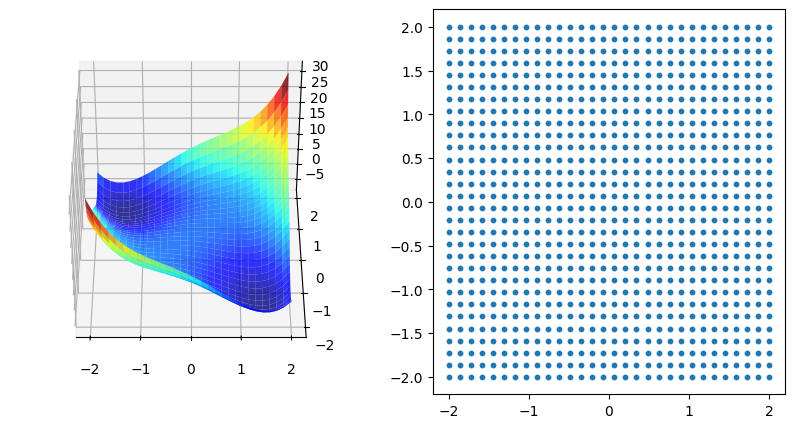

In [7]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection='3d',elev = 40, azim = 270)
ax1 = fig.add_subplot(122 )

ax.plot_surface(X,Y,f2(X,Y),cmap='jet',alpha=0.8)
ax1.scatter(X,Y,s=10)

In [8]:
# Derivadas parciales
Dx = lambda x,y,h=1e-5: (f2(x+h,y) - f2(x-h,y))/(2*h)
Dy = lambda x,y,h=1e-5: (f2(x,y+h) - f2(x,y-h))/(2*h)

In [9]:
x0,y0 = 0.5,0.6

In [23]:
# Definimos un vector unitario
u = lambda theta: np.array([np.cos(theta),np.sin(theta)])
theta = 1*np.pi

In [24]:
u(theta)

array([-1.0000000e+00,  1.2246468e-16])

In [25]:
u

<function __main__.<lambda>(theta)>

In [26]:
Gradient = lambda x,y: np.array([Dx(x,y),Dy(x,y)])
Gradient(x0,y0)

array([0.9  , 0.464])

In [27]:
def Getdf(x,y,theta):
  return np.dot(Gradient(x,y),u(theta))

In [28]:
Getdf(x0,y0,theta)

np.float64(-0.9000000001993522)

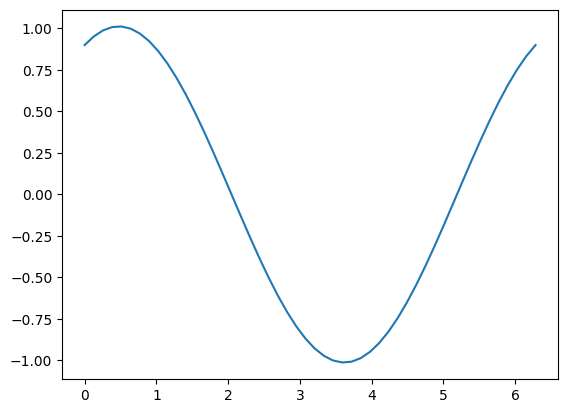

In [30]:
# Pintemos el ritmo de cambio de la funcion como funcion de theta
theta_ = np.linspace(0,2*np.pi,50)
df = np.array([Getdf(x0,y0,theta) for theta in theta_])
plt.plot(theta_,df)

In [33]:
orientaciongrad = np.arctan(Gradient(x0,y0)[1]/Gradient(x0,y0)[0])
print(orientaciongrad)

0.47601446978698714


In [34]:
Getdf(x0,y0,orientaciongrad)

np.float64(1.012569010279831)

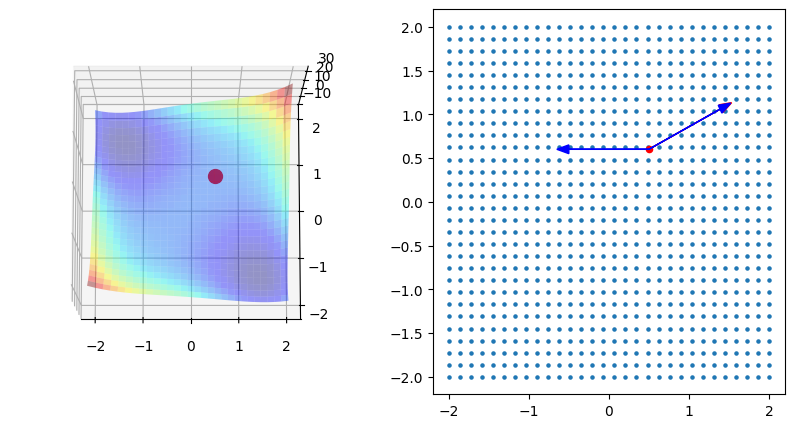

In [35]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection='3d',elev = 80, azim = 270)
ax1 = fig.add_subplot(122 )

ax.plot_surface(X,Y,f2(X,Y),cmap='jet',alpha=0.4)
ax.scatter(x0,y0,f2(x0,y0),color='r',s=100)

ax1.scatter(X,Y,s=5)
ax1.scatter(x0,y0,color='r',s=20)
ax1.arrow(x0,y0,Gradient(x0,y0)[0],Gradient(x0,y0)[1],color='r',head_width=0.1)
ax1.arrow(x0,y0,u(theta)[0],u(theta)[1],color='b',head_width=0.1)
ax1.arrow(x0,y0,u(orientaciongrad)[0],u(orientaciongrad)[1],color='b',head_width=0.1)